In [ ]:
#universal function approximation file with pytorch, 
#batch data creation using dataloaders,
#pytorch implementation for universal function approximation


In [1]:
#import
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

import matplotlib.pyplot as plt
#from IPython.display import display, Markdown, Latex

import numpy as np
import math, random
import pandas as pd
from pandas import DataFrame

from tqdm import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.nn.init as init
import torch.utils.data
import torch.optim 
from torch.optim import lr_scheduler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

from scipy.signal import gausspulse

%matplotlib notebook

In [3]:
#from utils import *

In [26]:
#setting the hyperparameters
HP = {
    #'NUM_HIDDEN_NODES'    : 10 ,
    'NUM_EXAMPLES'        : 1000 ,
    'TRAIN_SPLIT'         : .8 ,
    'MINI_BATCH_SIZE'     : 200 ,
    'NUM_EPOCHS'          : 100 ,
    'LEARNING_RATE'       : 1e-3 ,
    'LEARNING_RATE_DECAY' : 500 ,
    'WEIGHT_DECAY'        : 5e-4 ,
    'NUM_MOMENTUM'        : 0.9 ,
    'NUM_PATIENCE'        : 50 ,
    'SEED'                : 2018
}
np.random.seed(HP['SEED'])
torch.manual_seed(HP['SEED'])

#some essential fucntions that are used throughout
def to_np(x):
    return x.data.cpu().numpy()

def to_var(x, async=False):
    if torch.cuda.is_available():
        x = x.cuda(async=async)
    return Variable(x)

def weights_init(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight.data)
    """
    if m.bias is not None:
        torch.nn.init.zeros_(m.bias)
        """


In [27]:
#creat the function to be approximated
#https://discuss.pytorch.org/t/what-is-the-difference-between-view-and-unsqueeze/1155

gg=torch.linspace(-1,1,HP['NUM_EXAMPLES']) 

#then using unsqueeze, column vector can be created
x_data=np.float32(torch.unsqueeze(gg,dim=1).numpy())

x_data.shape

(1000, 1)

In [28]:
#funciton that you want tolearn
function_to_learn = lambda x: x**2 + 0.001*np.random.randn(*x.shape)

#output
y_data = function_to_learn(x_data)
y_data.shape


(1000, 1)

In [29]:
#random shuffle data

#creat index of data
idx=np.arange(HP['NUM_EXAMPLES'])

#shuffle the index
np.random.shuffle(idx)

#creat the test, train amf validate index from shuffled set
#using the split function
train_idx, validate_idx,  test_idx  = np.split(idx,[int(0.6*len(idx)), int(0.8*len(idx))])#train, validate, test

#creating colum vector of x_data and y_data
x_data=np.float32(x_data).reshape(HP['NUM_EXAMPLES'],1)
y_data=np.float32(y_data).reshape(HP['NUM_EXAMPLES'],1)



In [30]:
x_data.shape, y_data.shape

((1000, 1), (1000, 1))

In [31]:
#creating training data batch and test data batch

#first normalisation
scaler=MinMaxScaler(feature_range=(-1,1))

#creat the y train data and transofrm it using scaler
scaler.fit_transform(y_data[train_idx])

#X data is normalised

x_data=scaler.fit_transform(x_data)

#######creat training data (a and y)
#first identify x train, y train sets
train_x,train_y =  x_data[train_idx],y_data[train_idx]

# creat training set compising of both x and y
train_set=torch.utils.data.TensorDataset(torch.FloatTensor(train_x),torch.FloatTensor(train_y))

train_loader=torch.utils.data.DataLoader(train_set,batch_size=HP['MINI_BATCH_SIZE'],
                                         shuffle=True,pin_memory=True,num_workers=2)



#validation set
valid_x, valid_y=x_data[validate_idx],y_data[validate_idx]
valid_set=torch.utils.data.TensorDataset(torch.FloatTensor(valid_x),torch.FloatTensor(valid_y))
valid_loader=torch.utils.data.DataLoader(valid_set,batch_size=HP['MINI_BATCH_SIZE'],
                                         shuffle=True,
                                        pin_memory=True, num_workers=2)

#do the same for test data and validation data
test_x,test_y=x_data[test_idx],y_data[test_idx]
test_set= torch.utils.data.TensorDataset(torch.FloatTensor(test_x),torch.FloatTensor(test_y))
test_loader=torch.utils.data.DataLoader(test_set,batch_size=HP['MINI_BATCH_SIZE'],
                                        shuffle=False,
                                        pin_memory=True,num_workers=0)


print(train_x.shape, valid_x.shape, test_x.shape, train_y.shape, valid_y.shape, test_y.shape)


print("x_train is:"), print(train_x.shape)
print("y_train is:"), print(train_y.shape)



(600, 1) (200, 1) (200, 1) (600, 1) (200, 1) (200, 1)
x_train is:
(600, 1)
y_train is:
(600, 1)


(None, None)

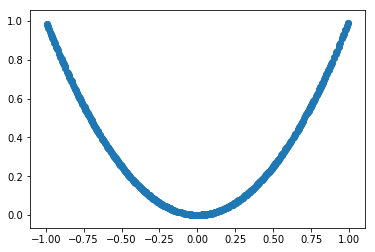

In [32]:
%matplotlib inline
plt.scatter(train_x,train_y)
#plt.scatter(test_x,test_y)

,x,y
count,600.000000,600.000000
mean,-0.019159,0.324415
std,0.569725,0.290693
min,-0.993994,-0.001498
25%,-0.508008,0.063628
50%,-0.010010,0.242336
75%,0.469970,0.556056
max,0.995996,0.990597


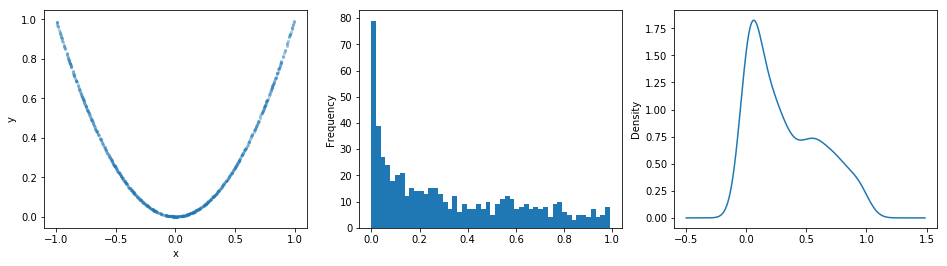

In [33]:
df = DataFrame({'x' : train_x.flatten(), 'y': train_y.flatten()})

fig, ax = plt.subplots(1,3,figsize=(16,4))

df.plot(kind='scatter', x='x', y='y', s=5.0, alpha=0.3, ax=ax[0])
df['y'].plot(kind='hist', bins=50, ax=ax[1])
df['y'].plot(kind='kde', ax=ax[2])

df.describe()

In [34]:
#build neural network in Network CLASS 
class Network(nn.Module):
    def __init__(self,D_in,D_out):
        super().__init__()
        
        # inputs
     
        
        # this is where the data flows in the network, respecting 
    def forward(self, x):
            

        
        return y


In [35]:
train_x.shape[1], train_y.shape[1]


(1, 1)

In [36]:
model = Network(train_x.shape[1], train_y.shape[1])
model.apply(weights_init)
#weighizalization routine (Xavier if batch normalisation is there int he netowrk, or else uniform)



Network(
  (lin1): Linear(in_features=1, out_features=144, bias=True)
  (lin2): Linear(in_features=144, out_features=72, bias=True)
  (lin3): Linear(in_features=72, out_features=36, bias=True)
  (output): Linear(in_features=36, out_features=1, bias=True)
)

In [38]:
# criterion, optimimizer 
criterion = 
optimizer = 

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [39]:
%matplotlib notebook


model.train()

train_losses = []
valid_losses = []
valid_score = []
epochs=[]

#start = time.time()

#epoch_iter = tqdm(range(1, HP['NUM_EPOCHS'] + 1))
epoch_iter =range(1, HP['NUM_EPOCHS'] + 1)

#for epoch in range(1, HP['NUM_EPOCHS'] + 1):

for epoch in epoch_iter:   
    #epoch_iter.set_description('Epoch')
    
    epochs.append(epoch)
    
    #training over all batch data
    batch_idx, tloss_avg,vloss_avg = 0, 0,0
    for batch_idx, (data, target) in enumerate(train_loader):
        # predict y based on x
        
        # compute loss

        # clear gradients
        
        # compute gradients
        
        # apply gradients

        tloss_avg += loss.item()

    tloss_avg /= batch_idx+1
    train_losses.append(tloss_avg)
        
    print(" Epoch : %s , Train loss: %s " %(epoch,tloss_avg))    
    
    """
    #do the same for validation 
    

    vloss_avg /= batch_idx+1
    valid_losses.append(vloss_avg)
    
    print(" Epoch : %d , Train loss: %d, Validaiton Loss: %d " %(epoch,tloss_avg,vloss_avg))    
    """
        
      

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


 Epoch : 1 , Train loss: 93 
 Epoch : 2 , Train loss: 107 
 Epoch : 3 , Train loss: 106 
 Epoch : 4 , Train loss: 100 
 Epoch : 5 , Train loss: 70 
 Epoch : 6 , Train loss: 30 
 Epoch : 7 , Train loss: 16 
 Epoch : 8 , Train loss: 18 
 Epoch : 9 , Train loss: 21 
 Epoch : 10 , Train loss: 16 
 Epoch : 11 , Train loss: 16 
 Epoch : 12 , Train loss: 16 
 Epoch : 13 , Train loss: 16 
 Epoch : 14 , Train loss: 16 
 Epoch : 15 , Train loss: 16 
 Epoch : 16 , Train loss: 16 
 Epoch : 17 , Train loss: 15 
 Epoch : 18 , Train loss: 15 
 Epoch : 19 , Train loss: 15 
 Epoch : 20 , Train loss: 15 
 Epoch : 21 , Train loss: 15 
 Epoch : 22 , Train loss: 15 
 Epoch : 23 , Train loss: 15 
 Epoch : 24 , Train loss: 15 
 Epoch : 25 , Train loss: 15 
 Epoch : 26 , Train loss: 14 
 Epoch : 27 , Train loss: 14 
 Epoch : 28 , Train loss: 14 
 Epoch : 29 , Train loss: 14 
 Epoch : 30 , Train loss: 16 
 Epoch : 31 , Train loss: 16 
 Epoch : 32 , Train loss: 16 
 Epoch : 33 , Train loss: 14 
 Epoch : 34 , Tr

<IPython.core.display.Javascript object>


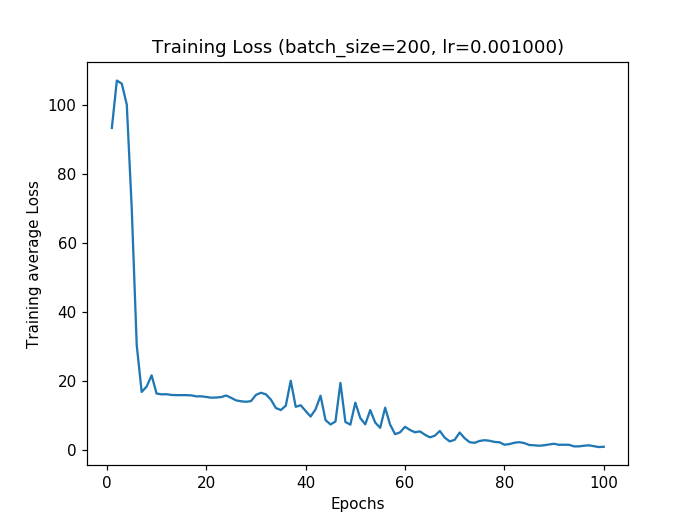

In [41]:
%matplotlib notebook
plt.figure()
plt.plot(epochs, train_losses)
plt.title("Training Loss (batch_size=%d, lr=%.6f)" %(HP['MINI_BATCH_SIZE'],HP['LEARNING_RATE']))
plt.xlabel("Epochs")
plt.ylabel("Training average Loss")
plt.show()



ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

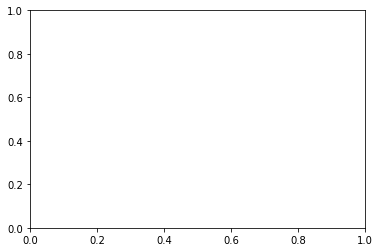

In [42]:
%matplotlib inline
plt.figure()
plt.plot(epochs, valid_losses)
plt.title("Validation Loss (batch_size=%d, lr=%.6f)" %(HP['MINI_BATCH_SIZE'],HP['LEARNING_RATE']))
plt.xlabel("Epochs")
plt.ylabel("Validaiton Loss ")
plt.show()



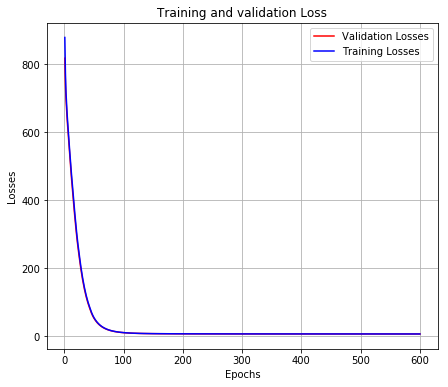

In [380]:

plt.figure(figsize=(7,6))
plt.plot(epochs, valid_losses,label='Validation Losses', color='r')
plt.plot(epochs, train_losses,label='Training Losses', color='b')
plt.title("Training and validation Loss")
plt.xlabel("Epochs");
plt.ylabel("Losses");
plt.grid(True)
plt.legend(loc='upper right');

In [44]:

#net = model(train_x.shape[1], train_y.shape[1])
model.eval()




Network(
  (lin1): Linear(in_features=1, out_features=144, bias=True)
  (lin2): Linear(in_features=144, out_features=72, bias=True)
  (lin3): Linear(in_features=72, out_features=36, bias=True)
  (output): Linear(in_features=36, out_features=1, bias=True)
)

C:\ProgramData\Anaconda3\lib\site-packages\torch\nn\functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


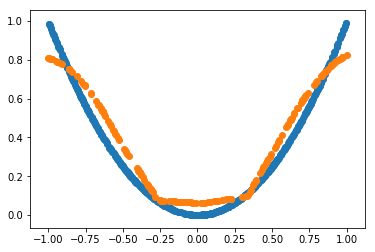

In [45]:
#testing the data plot with test x
inp=test_x
input=torch.from_numpy(inp)
output=model(to_var(input))
out=to_np(output)

#plotting
plt.figure()

plt.scatter(train_x,train_y)
plt.scatter(inp.flatten(),out.flatten())

New non-linear funciton ,
Evaluate the score, accuracy,  

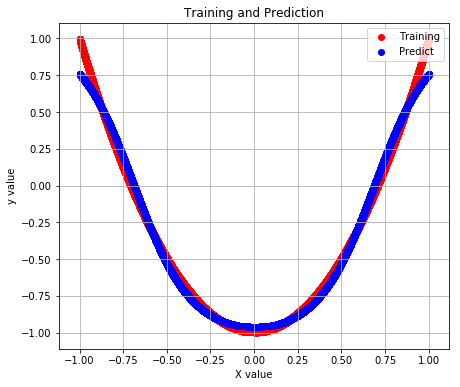

In [384]:
plt.figure(figsize=(7,6))
plt.scatter(train_x.flatten(), train_y.flatten(), label='Training', color='r')
plt.scatter(test_x1.flatten(),y_pred.flatten(),label='Predict', color='b')
#plt.scatter(data,to_np(y_pred) ,label='Predict', color='b')
#plt.scatter (test_x,y_pred1)
plt.title("Training and Prediction")
plt.xlabel("X value");
plt.ylabel("y value");
plt.grid(True)
plt.legend(loc='upper right');

In [243]:

#see the use of zip for mapping the data and unzip using *
#https://www.geeksforgeeks.org/zip-in-python/

dd=zip(test_x1,y_pred)
#convert to list to print 
ddl=list(dd)
print(ddl)

[(array([[0.05263162],
       [0.5789474 ]], dtype=float32), array([[-0.01165612],
       [-0.02838607]], dtype=float32)), (array([[ 0.36842108],
       [-0.8947368 ]], dtype=float32), array([[-0.02190739],
       [ 0.01792494]], dtype=float32))]
